## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Titanic Dataset 

In [31]:
ds = pd.read_csv('titanic.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Dataset Preview

In [4]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping Unwanted Columns

In [5]:
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = ds.drop(cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Converting Column's('sex') entries from Strings to Numbers

In [6]:
def convert_sex_to_num(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s

df.Sex = df.Sex.map(convert_sex_to_num)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [7]:
data = df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


## Plotting HeatMap of Co-relation matrix

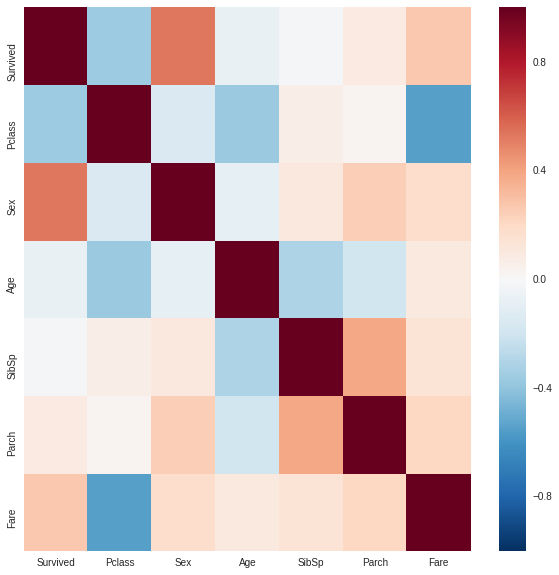

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())  # Negative Co-relation Means variables Have Inverse Relation

In [10]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
out_cols = ['Survived']

X = data[input_cols]
y = data[out_cols]

#X.head()
print X.shape, y.shape

(714, 6) (714, 1)


In [11]:
data = data.reset_index(drop=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [12]:
data.loc[2]

Survived     1.000
Pclass       3.000
Sex          1.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

# Functions for Decision Tree

Information gain:

$$I(y,x)=H(y)−[p_{x=0}H(y|x=0)+p_{x=1}H(y|x=1))]$$

- y is original set
- x is feature used to split
- $p_{x=k}$ is proportion of elements in that split

In [13]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    
    for ix in xrange(x_data.shape[0]):
        # Retrieve the current value for the fkey column
        val = x_data[fkey].loc[ix]
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(x_data.loc[ix])
        else:
            # pass the row to left
            x_left = x_left.append(x_data.loc[ix])
    
    # return the divided datasets
    return x_left, x_right


def entropy(col):    
    counts = np.unique(col, return_counts=True)  # like ([0, 1], [10, 15])
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in range(counts[1].shape[0]):   # DOUBT 
        f = counts[1][ix] / N
        ent += (-1.0 * f * np.log2(f))
    return ent

def information_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    P = float(left.shape[0])/xdata.shape[0]
    Q = float(right.shape[0])/xdata.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(xdata.Survived) - (P*entropy(left.Survived) + Q*entropy(right.Survived))

In [14]:
for fx in X.columns:
    print fx,
    print information_gain(data, fx, data[fx].mean())

Pclass 0.0841581440715109
Sex 0.21601606075154256
Age 2.6666107433293007e-08
SibSp 0.006904127996153919
Parch 0.019278172321014586
Fare 0.05371958996365245


In [15]:
class DecisionTree:
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self, X_train):
        print self.depth, '-'*10
        # Get the best possible feature and division value
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gains = []
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        # store the best feature (using min information gain)
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
        # divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Check the shapes
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:  # In this we have recieved all the points in one of
            if X_train.Survived.mean() >= 0.5:                   # the two childs so there is no point in splitting
                self.target = 'Survived'                         # the parent node, so we will rather than labelling 
            else:                                                # the node which recieved all the points cos both
                self.target = 'Dead'                             # nodes and its parent are same therefore we'll 
            return                                               # label the parent node.
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        
        # branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        # branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Dead'
        
        return
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            # go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # go left
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [16]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]

In [17]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------


In [18]:
print dt.fkey, dt.fval
print dt.right.fkey, dt.right.fval
print dt.left.fkey, dt.left.fval

print dt.right.right.fkey, dt.right.right.fval
print dt.right.left.fkey, dt.right.left.fval


print dt.left.right.fkey, dt.left.right.fval
print dt.left.left.fkey, dt.left.left.fval


Sex 0.36777583187390545
Pclass 2.080952380952381
Fare 28.257881994459833
SibSp 0.9036144578313253
Age 30.830708661417322
SibSp 1.0721649484536082
Fare 12.418069696969695


## Predicting whether Passenger will be dead or alive 

In [19]:
for ix in testing_data.index[:10]:
    print dt.predict(testing_data.loc[ix])
    #print testing_data.loc[ix]
    #print '-'*80

Dead
Survived
Dead
Dead
Dead
Survived
Dead
Survived
Dead
Dead


In [20]:
testing_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
571,0,3,0,33.0,0,0,7.7750
572,1,2,1,6.0,0,1,33.0000
573,0,3,0,17.0,1,0,7.0542
574,0,2,0,34.0,0,0,13.0000
575,0,2,0,50.0,0,0,13.0000
576,1,1,0,27.0,1,0,53.1000
577,0,3,0,20.0,0,0,8.6625
578,1,2,1,30.0,3,0,21.0000
579,0,2,0,25.0,1,0,26.0000
580,0,3,1,25.0,1,0,7.9250


## Testing/Camparing Performance with Scikit-Learn's DecisionTree Algorithm

In [22]:
import sklearn

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
DT = DecisionTreeClassifier()
DT.fit(X[:split], y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
DT.score(X[split:], y[split:])

0.7972027972027972

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X[:split], y[:split])

rf.score(X[split:], y[split:])

/home/gunish/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8531468531468531